# Exploration of the microbiota dataset

In [33]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import src.data.dataloader as dataloader

## NIPICOL Experiment: data extraction

We have at our disposal the results of a given experiments named "NIPICOL". The experiment was conducted over 83 patients, and consists in determining the patient's health state after the study given its microbiota composition.

For the sake of anonymization, each patient name is encrypted in an id formatted as "FRA..."with 11 characters, and sometimes a "bis" annotation that is yet to be determined.

In the NIPICOL dataframe, we get the microbiota composition of the individuals in the dataset. Each column is an individual, and each row represents the proportion of a given bacteria in its composition. The rows name match the taxonomy of the bacteria specimen for which the proportion is assessed.

In the mapping dataframe, we get various annotations about each patient. Specifically, we are interested in the `best_irecist` column indicates the response of the patient to the study and forms our main interest label. `CR` signifying a complete remission, we will consider the other labels to be negative results of the study so to binarize our labels.

Hence, our goal is to predict a complete remission given the microbiota composition of each individual.

In [34]:
df = dataloader.get_NIPICOL(2, 'src/data')
df

,FRA022001CA,FRA022002BB,FRA022003GA,FRA022004MC,FRA022005KF,FRA022006TS,FRA022007LP,FRA022008DM,FRA022010KI,FRA022011RB,...,FRA106001LH,FRA106003ER,FRA106004CA,FRA123001AI,FRA189001NM,FRA189002AL,FRA189004JL,FRA189005JP,FRA189010CM,FRA256001DJ
ASV_ID,,,,,,,,,,,,,,,,,,,,,
d__Bacteria| p__Actinobacteriota| c__Actinobacteria,0.029604,0.000564,0.000235,0.000000,0.004913,0.042085,0.002644,0.166539,0.328018,0.011556,...,0.008775,0.087667,0.011556,0.190892,0.007770,0.000000,0.00,0.005704,0.002679,0.046107
d__Bacteria| p__Actinobacteriota| c__Coriobacteriia,0.001779,0.000996,0.064885,0.006518,0.001659,0.014414,0.015946,0.004527,0.033420,0.015669,...,0.000000,0.000534,0.022594,0.047247,0.002853,0.026890,0.00,0.006963,0.038944,0.021711
d__Bacteria| p__Bacteroidota| c__Bacteroidia,0.470511,0.568708,0.254727,0.314645,0.299962,0.195004,0.210058,0.166983,0.179755,0.320553,...,0.057895,0.163832,0.322616,0.524318,0.135120,0.270744,0.00,0.487099,0.292902,0.230244
d__Bacteria| p__Campilobacterota| c__Campylobacteria,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
d__Bacteria| p__Desulfobacterota| c__Desulfovibrionia,0.000000,0.000000,0.003112,0.013261,0.000000,0.000672,0.000000,0.000000,0.000000,0.003721,...,0.000000,0.000510,0.014964,0.000913,0.001916,0.002689,0.00,0.000543,0.000584,0.002510
d__Bacteria| p__Firmicutes| c__Bacilli,0.001922,0.022145,0.182149,0.010539,0.064718,0.039135,0.021482,0.043049,0.132918,0.011209,...,0.506412,0.020309,0.017112,0.014452,0.016094,0.010026,0.25,0.134565,0.009169,0.003794
d__Bacteria| p__Firmicutes| c__Clostridia,0.463310,0.381100,0.249941,0.611133,0.482788,0.691213,0.713515,0.234003,0.317654,0.604798,...,0.000000,0.704486,0.563079,0.130147,0.798799,0.655655,0.75,0.319424,0.396339,0.647601
d__Bacteria| p__Firmicutes| c__Negativicutes,0.025473,0.000000,0.000000,0.000475,0.003536,0.000000,0.012228,0.023768,0.000000,0.000000,...,0.000652,0.001140,0.022668,0.079049,0.016818,0.030309,0.00,0.007111,0.000000,0.000000
d__Bacteria| p__Fusobacteriota| c__Fusobacteriia,0.000000,0.000000,0.000000,0.006618,0.138637,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000217,0.000000,0.003556,0.000913,0.000404,0.000000,0.00,0.000000,0.000000,0.000000


In [35]:
mapping = dataloader.get_mapping_NIPICOL('src/data')
mapping

,id,numpat,Exp,timepoint,to_take,Subject_ID,irecistw12,irecistw12_tp,best_irecist,best_irecist_tp,best_irecist2,best_irecist2_tp,iPFS_progr,ipfs_time,os_time,os_event
0,FRA022001CA,FRA022-001,nipicol,S0,yes,1,SD,S0_SD,SD,S0_SD,SD,S0_SD,0,19.022587,19.055441,0
2,FRA022002BB,FRA022-002,nipicol,S0,yes,2,SD,S0_SD,PR,S0_PR,PR_CR,S0_PR_CR,0,25.494867,25.494867,0
4,FRA022003GA,FRA022-003,nipicol,S0,yes,3,SD,S0_SD,PR,S0_PR,PR_CR,S0_PR_CR,0,25.297741,25.297741,0
6,FRA022004MC,FRA022-004,nipicol,S0,yes,4,SD,S0_SD,SD,S0_SD,SD,S0_SD,1,4.501027,4.501027,1
8,FRA022005KF,FRA022-005,nipicol,S0,yes,5,PR,S0_PR,PR,S0_PR,PR_CR,S0_PR_CR,0,25.626283,25.626283,0
10,FRA022006TS,FRA022-006,nipicol,S0,yes,6,PR,S0_PR,CR,S0_CR,PR_CR,S0_PR_CR,0,25.396304,25.396304,0
12,FRA022007LP,FRA022-007,nipicol,S0,yes,7,PR,S0_PR,PR,S0_PR,PR_CR,S0_PR_CR,0,5.749487,5.880903,0
14,FRA022008DM,FRA022-008,nipicol,S0,yes,8,PR,S0_PR,PR,S0_PR,PR_CR,S0_PR_CR,0,24.837782,24.837782,0
16,FRA022010KI,FRA022-010,nipicol,S0,yes,12,SD,S0_SD,CR,S0_CR,PR_CR,S0_PR_CR,0,25.034908,25.034908,0
18,FRA022011RB,FRA022-011,nipicol,S0,yes,13,PR,S0_PR,PR,S0_PR,PR_CR,S0_PR_CR,0,24.804928,24.804928,0


From these raw data we will conceive our data matrix `X` and the labels `y`.

In [36]:
X = df.transpose()
X.columns = df.transpose().columns.tolist()[:]
X = X.astype(np.float64)
X

,d__Bacteria| p__Actinobacteriota| c__Actinobacteria,d__Bacteria| p__Actinobacteriota| c__Coriobacteriia,d__Bacteria| p__Bacteroidota| c__Bacteroidia,d__Bacteria| p__Campilobacterota| c__Campylobacteria,d__Bacteria| p__Desulfobacterota| c__Desulfovibrionia,d__Bacteria| p__Firmicutes| c__Bacilli,d__Bacteria| p__Firmicutes| c__Clostridia,d__Bacteria| p__Firmicutes| c__Negativicutes,d__Bacteria| p__Fusobacteriota| c__Fusobacteriia,d__Bacteria| p__Proteobacteria| c__Alphaproteobacteria,d__Bacteria| p__Proteobacteria| c__Gammaproteobacteria,d__Bacteria| p__Spirochaetota| c__Spirochaetia
FRA022001CA,0.029604,0.001779,0.470511,0.0,0.000000,0.001922,0.463310,0.025473,0.000000,0.000430,0.006971,0.000000
FRA022002BB,0.000564,0.000996,0.568708,0.0,0.000000,0.022145,0.381100,0.000000,0.000000,0.001673,0.024814,0.000000
FRA022003GA,0.000235,0.064885,0.254727,0.0,0.003112,0.182149,0.249941,0.000000,0.000000,0.000147,0.244803,0.000000
FRA022004MC,0.000000,0.006518,0.314645,0.0,0.013261,0.010539,0.611133,0.000475,0.006618,0.015908,0.020903,0.000000
FRA022005KF,0.004913,0.001659,0.299962,0.0,0.000000,0.064718,0.482788,0.003536,0.138637,0.001001,0.002785,0.000000
FRA022006TS,0.042085,0.014414,0.195004,0.0,0.000672,0.039135,0.691213,0.000000,0.000000,0.000299,0.017178,0.000000
FRA022007LP,0.002644,0.015946,0.210058,0.0,0.000000,0.021482,0.713515,0.012228,0.000000,0.000413,0.023713,0.000000
FRA022008DM,0.166539,0.004527,0.166983,0.0,0.000000,0.043049,0.234003,0.023768,0.000000,0.024172,0.336958,0.000000
FRA022010KI,0.328018,0.033420,0.179755,0.0,0.000000,0.132918,0.317654,0.000000,0.000000,0.000603,0.007632,0.000000
FRA022011RB,0.011556,0.015669,0.320553,0.0,0.003721,0.011209,0.604798,0.000000,0.000000,0.022279,0.010215,0.000000


In [37]:
y = mapping['best_irecist'].apply(lambda x : (x == 'CR') * 1).astype(np.int32)
y.index = mapping.id
y

id
FRA022001CA    0
FRA022002BB    0
FRA022003GA    0
FRA022004MC    0
FRA022005KF    0
FRA022006TS    1
FRA022007LP    0
FRA022008DM    0
FRA022010KI    1
FRA022011RB    0
FRA022012GF    0
FRA022013ZV    0
FRA022014RD    0
FRA022015BF    0
FRA022016AS    0
FRA022018LS    0
FRA022019RX    0
FRA022020BF    0
FRA022021MP    1
FRA022022RH    1
FRA022023DC    0
FRA022025BE    0
FRA022026CN    0
FRA022027LP    0
FRA022028BM    1
FRA074002DB    0
FRA084001JL    0
FRA084005RC    0
FRA094001CA    0
FRA094002BD    0
FRA094003DR    0
FRA094004TD    1
FRA106001LH    0
FRA106003ER    1
FRA106004CA    0
FRA123001AI    1
FRA189001NM    0
FRA189002AL    0
FRA189004JL    0
FRA189005JP    0
FRA189010CM    0
FRA256001DJ    1
Name: best_irecist, dtype: int32

In [38]:
dataset = X.copy()
dataset['label'] = y
dataset

,d__Bacteria| p__Actinobacteriota| c__Actinobacteria,d__Bacteria| p__Actinobacteriota| c__Coriobacteriia,d__Bacteria| p__Bacteroidota| c__Bacteroidia,d__Bacteria| p__Campilobacterota| c__Campylobacteria,d__Bacteria| p__Desulfobacterota| c__Desulfovibrionia,d__Bacteria| p__Firmicutes| c__Bacilli,d__Bacteria| p__Firmicutes| c__Clostridia,d__Bacteria| p__Firmicutes| c__Negativicutes,d__Bacteria| p__Fusobacteriota| c__Fusobacteriia,d__Bacteria| p__Proteobacteria| c__Alphaproteobacteria,d__Bacteria| p__Proteobacteria| c__Gammaproteobacteria,d__Bacteria| p__Spirochaetota| c__Spirochaetia,label
FRA022001CA,0.029604,0.001779,0.470511,0.0,0.000000,0.001922,0.463310,0.025473,0.000000,0.000430,0.006971,0.000000,0
FRA022002BB,0.000564,0.000996,0.568708,0.0,0.000000,0.022145,0.381100,0.000000,0.000000,0.001673,0.024814,0.000000,0
FRA022003GA,0.000235,0.064885,0.254727,0.0,0.003112,0.182149,0.249941,0.000000,0.000000,0.000147,0.244803,0.000000,0
FRA022004MC,0.000000,0.006518,0.314645,0.0,0.013261,0.010539,0.611133,0.000475,0.006618,0.015908,0.020903,0.000000,0
FRA022005KF,0.004913,0.001659,0.299962,0.0,0.000000,0.064718,0.482788,0.003536,0.138637,0.001001,0.002785,0.000000,0
FRA022006TS,0.042085,0.014414,0.195004,0.0,0.000672,0.039135,0.691213,0.000000,0.000000,0.000299,0.017178,0.000000,1
FRA022007LP,0.002644,0.015946,0.210058,0.0,0.000000,0.021482,0.713515,0.012228,0.000000,0.000413,0.023713,0.000000,0
FRA022008DM,0.166539,0.004527,0.166983,0.0,0.000000,0.043049,0.234003,0.023768,0.000000,0.024172,0.336958,0.000000,0
FRA022010KI,0.328018,0.033420,0.179755,0.0,0.000000,0.132918,0.317654,0.000000,0.000000,0.000603,0.007632,0.000000,1
FRA022011RB,0.011556,0.015669,0.320553,0.0,0.003721,0.011209,0.604798,0.000000,0.000000,0.022279,0.010215,0.000000,0


## Statistical analysis

In this section, we highlight some simple statistics on the NIPICOL dataset to get a better hang of the dynamic of our problem.

In [39]:
proportion_label_1 = y.sum() / len(y)
print(f"Proportion of label 1 individuals: {proportion_label_1}")

Proportion of label 1 individuals: 0.21428571428571427


Hence we will be working on an imbalanced dataset.

Now we conduct an analysis on the bacteria and their possible link with the labels.

In [40]:
dataset.groupby('label').mean().transpose().boxplot()
plt.show()

<AxesSubplot: >

As it seems, the distribution of the bacteria whether someone has label 1 or 0 isn't the same on an average basis. Now let's highlight the bacteria for which the distinction is significant between the 2 classes.

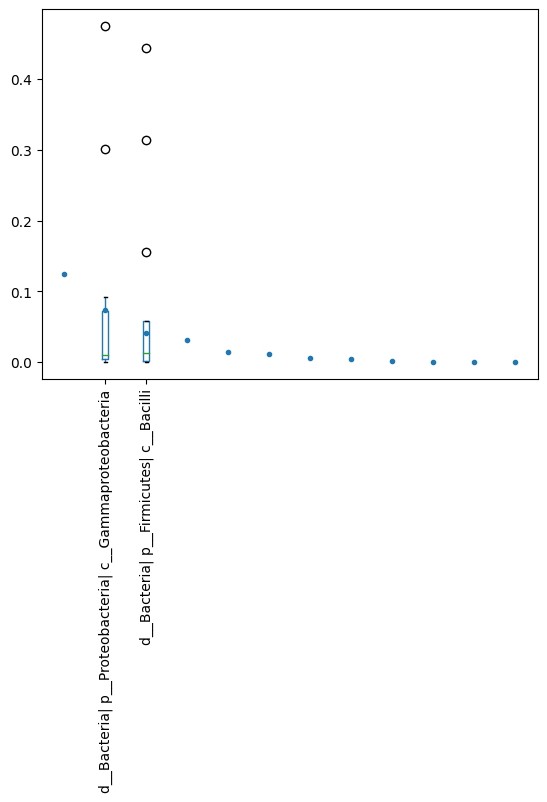

In [41]:
mean_values = dataset.groupby('label').mean()
diff_mean_proportion = (mean_values.iloc[0] - mean_values.iloc[1]).abs()
diff_mean_proportion = diff_mean_proportion.sort_values(ascending=False)

diff_mean_proportion.plot(rot=90, marker='.', linestyle='')
plt.show()

In [42]:
# Print de n most varying on average between label 1 and 0 individuals
diff_mean_proportion.head(5)

d__Bacteria| p__Actinobacteriota| c__Actinobacteria       0.125300
d__Bacteria| p__Proteobacteria| c__Gammaproteobacteria    0.074315
d__Bacteria| p__Firmicutes| c__Bacilli                    0.040637
d__Bacteria| p__Firmicutes| c__Clostridia                 0.031417
d__Bacteria| p__Bacteroidota| c__Bacteroidia              0.013827
dtype: float64

In [43]:
# What proportion of bacteria are not changing much on average at threshold 0.001% ?
diff_mean_proportion[diff_mean_proportion < 0.001].count() / diff_mean_proportion.count()

0.25

As we look into the variation in composition of the microbiota of label 1 and 0 individuals, it seems that some bacteria can vary by a significant amount. Note though that most of the composition is left almost unchanged.

Now, we look into a possible correlation between the microbiota composition and the associated label of the individual.

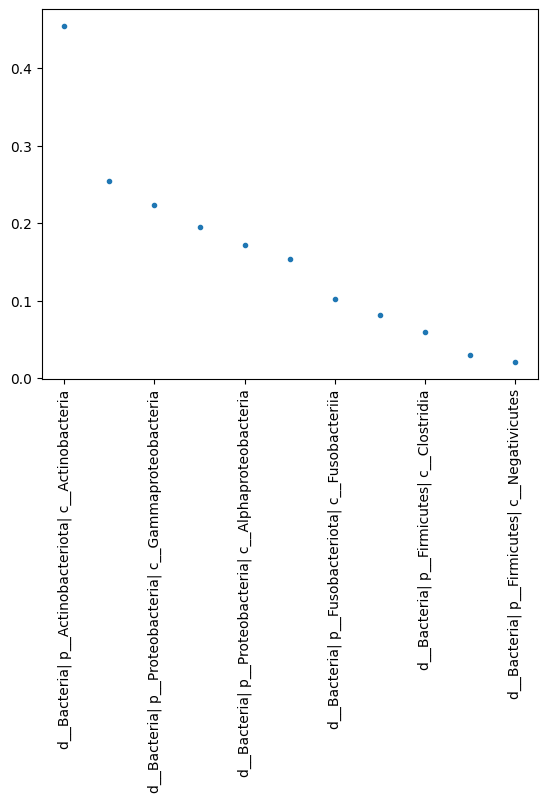

In [44]:
correlation_with_label = dataset.corr()['label'].abs().sort_values(ascending=False)
correlation_with_label = correlation_with_label.drop(correlation_with_label.index[0])
correlation_with_label.plot(rot=90, marker='.', linestyle='')
plt.show()

As it seems, there exists a direct absolute correlation between some bacteria and the associated label. Some seem to be way less impacting than others in the result, but most of them seems to play an informative role.

Looking at the correlation between the different features, we can obtain the following correlation matrix.

In [45]:
X.corr()

,d__Bacteria| p__Actinobacteriota| c__Actinobacteria,d__Bacteria| p__Actinobacteriota| c__Coriobacteriia,d__Bacteria| p__Bacteroidota| c__Bacteroidia,d__Bacteria| p__Campilobacterota| c__Campylobacteria,d__Bacteria| p__Desulfobacterota| c__Desulfovibrionia,d__Bacteria| p__Firmicutes| c__Bacilli,d__Bacteria| p__Firmicutes| c__Clostridia,d__Bacteria| p__Firmicutes| c__Negativicutes,d__Bacteria| p__Fusobacteriota| c__Fusobacteriia,d__Bacteria| p__Proteobacteria| c__Alphaproteobacteria,d__Bacteria| p__Proteobacteria| c__Gammaproteobacteria,d__Bacteria| p__Spirochaetota| c__Spirochaetia
d__Bacteria| p__Actinobacteriota| c__Actinobacteria,1.000000,0.424432,-0.086504,NaN,-0.176523,-0.092330,-0.365917,0.118412,-0.048722,-0.087777,-0.108766,-0.024066
d__Bacteria| p__Actinobacteriota| c__Coriobacteriia,0.424432,1.000000,-0.130658,NaN,0.142759,-0.003634,-0.157301,0.044230,-0.119837,-0.155989,-0.039054,-0.118062
d__Bacteria| p__Bacteroidota| c__Bacteroidia,-0.086504,-0.130658,1.000000,NaN,0.049820,-0.422169,-0.428681,0.143877,0.000355,-0.051969,-0.264176,0.042854
d__Bacteria| p__Campilobacterota| c__Campylobacteria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d__Bacteria| p__Desulfobacterota| c__Desulfovibrionia,-0.176523,0.142759,0.049820,NaN,1.000000,-0.249349,0.269291,-0.119172,-0.062065,-0.007620,-0.182508,0.011724
d__Bacteria| p__Firmicutes| c__Bacilli,-0.092330,-0.003634,-0.422169,NaN,-0.249349,1.000000,-0.251994,-0.201771,-0.005610,-0.033411,0.292885,-0.079251
d__Bacteria| p__Firmicutes| c__Clostridia,-0.365917,-0.157301,-0.428681,NaN,0.269291,-0.251994,1.000000,-0.142263,0.005453,0.032373,-0.480862,0.017991
d__Bacteria| p__Firmicutes| c__Negativicutes,0.118412,0.044230,0.143877,NaN,-0.119172,-0.201771,-0.142263,1.000000,-0.059032,-0.132747,-0.004559,0.360199
d__Bacteria| p__Fusobacteriota| c__Fusobacteriia,-0.048722,-0.119837,0.000355,NaN,-0.062065,-0.005610,0.005453,-0.059032,1.000000,-0.076272,-0.088667,-0.031473
d__Bacteria| p__Proteobacteria| c__Alphaproteobacteria,-0.087777,-0.155989,-0.051969,NaN,-0.007620,-0.033411,0.032373,-0.132747,-0.076272,1.000000,0.096332,-0.071739


## Predictive models

### Logistic regression

Recall that our goal is to predict the label of each individual given their microbiota structure. We perform some rudimentary preprocessing:
- rescaling in $[0,1]$
- standardization
- adding column of 1 for bias

First, we try the simplest model possible: the logistic regression.

In [46]:
# Standardization
# X = (X - X.mean())/X.std()
# Min/Max scaling
# X = (X - X.min())/(X.max() - X.min())
# Adding a constant column for bias
X['constant'] = 1

print(np.isnan(X.values).any())

False


In [47]:
from sklearn.model_selection import StratifiedShuffleSplit
# Building training and test sets in a stratified fashion so we keep a similar distribution of labels

n_folds = 5
stratifier = StratifiedShuffleSplit(n_splits=n_folds, test_size=0.30)
for i, (train_index, test_index) in enumerate(stratifier.split(X, y)):
    continue

X_train, y_train = X.values[train_index], y.values[train_index]
X_test, y_test = X.values[test_index], y.values[test_index]

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, f1_score
from src.utils.functions import accuracy

logistic_reg = LogisticRegression(
    penalty='l2',
)
logistic_reg.fit(X_train, y_train)
y_pred = logistic_reg.predict(X_test)
print("Logistic regression metrics:")
print("Accuracy:", logistic_reg.score(X_test, y_test))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Logistic regression metrics:
Accuracy: 0.7692307692307693
Balanced Accuracy: 0.5
Confusion matrix:
 [[10  0]
 [ 3  0]]


In [49]:
def evaluate(model, predict_fun, training_steps=0):
    size = n_folds
    mean_accuracy = np.zeros(size)
    mean_balanced_accuracy = np.zeros(size)
    mean_f1 = np.zeros(size)
    mean_cm = 0
    for i, (train_index, test_index) in enumerate(stratifier.split(X, y)):
        print("* Fold", i)
        X_train_fold, y_train_fold = X.values[train_index], y.values[train_index]
        X_test_fold, y_test_fold = X.values[test_index], y.values[test_index]
        model.fit(X_train_fold, y_train_fold)
        if training_steps > 0:
            model.train(training_steps, 1)
        y_pred = predict_fun(X_test_fold)
        print("     Accuracy:", accuracy(y_test_fold, y_pred))
        print("     Balanced Accuracy:", balanced_accuracy_score(y_test_fold, y_pred))
        print("     F1 score:", f1_score(y_test_fold, y_pred))
        print("     Confusion matrix:\n", confusion_matrix(y_test_fold, y_pred))

        mean_accuracy[i] = accuracy(y_test_fold, y_pred)
        mean_balanced_accuracy[i] = balanced_accuracy_score(y_test_fold, y_pred)
        mean_f1[i] = f1_score(y_test_fold, y_pred)
        mean_cm += confusion_matrix(y_test_fold, y_pred)

    print("[Summary]")
    print("     Accuracy:", mean_accuracy.mean(), "±", mean_accuracy.std())
    print("     Balanced Accuracy:", mean_balanced_accuracy.mean(), "±", mean_balanced_accuracy.std())
    print("     F1 score:", mean_f1.mean(), "±", mean_f1.std())
    print("     (sum) Confusion matrix:\n", mean_cm)
    return mean_accuracy, mean_balanced_accuracy, mean_f1, mean_cm

_ = evaluate(logistic_reg, logistic_reg.predict)

* Fold 0
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.5
     F1 score: 0.0
     Confusion matrix:
 [[10  0]
 [ 3  0]]
* Fold 1
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.5
     F1 score: 0.0
     Confusion matrix:
 [[10  0]
 [ 3  0]]
* Fold 2
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.5
     F1 score: 0.0
     Confusion matrix:
 [[10  0]
 [ 3  0]]
* Fold 3
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.5
     F1 score: 0.0
     Confusion matrix:
 [[10  0]
 [ 3  0]]
* Fold 4
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.5
     F1 score: 0.0
     Confusion matrix:
 [[10  0]
 [ 3  0]]
[Summary]
     Accuracy: 0.7692307692307693 ± 0.0
     Balanced Accuracy: 0.5 ± 0.0
     F1 score: 0.0 ± 0.0
     (sum) Confusion matrix:
 [[50  0]
 [15  0]]


### Latent model with logistic regression

In this section, we aim at potentially improving the previous results by introducing a latent variable model in our logistic regression.

The model is the following:
- $Z_i \sim \mathcal{B}(\pi)$
- $p_{\theta}(X_i | Z_i) \sim \mathcal{N}(\mu, \Sigma)$
- $\mathbb{P}(Y_i = 1 | X_i, Z_i = k) = \sigma(W_{e,k} e_k + W_{x,k} X_i)$

First, we try to determine a relevant space for $Z$.

In [50]:
from sklearn.mixture import GaussianMixture

n_component_list = [1, 2, 3, 5, 8, 10, 15, 20]
bic = np.zeros(len(n_component_list))
aic = np.zeros(len(n_component_list))

X_tild_train = np.concatenate((X_train, y_train.reshape(-1, 1)), axis=1)
X_tild_test = np.concatenate((X_test, y_test.reshape(-1, 1)), axis=1)
for i, n_component in enumerate(n_component_list):
    gmm = GaussianMixture(n_components=n_component, random_state=0)
    gmm.fit(X_tild_train)
    bic[i] = gmm.bic(X_tild_test)
    aic[i] = gmm.aic(X_tild_test)

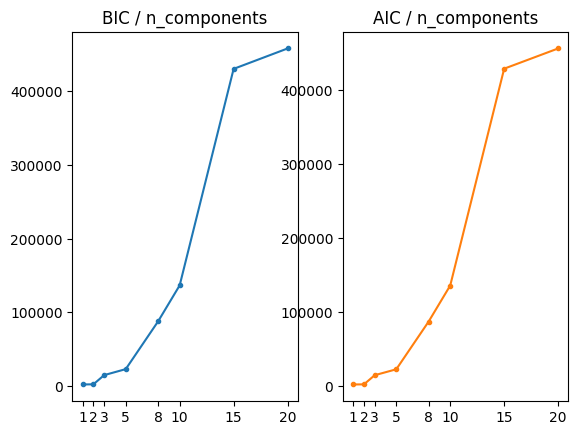

In [51]:
fig, axs = plt.subplots(1, 2)
axs[0].set_title("BIC / n_components")
axs[0].plot(n_component_list, bic, marker='.', color='C0')
axs[1].set_title("AIC / n_components")
axs[1].plot(n_component_list, aic, marker='.', color='C1')
for ax in axs:
    ax.set_xticks(n_component_list)
plt.show()

In [101]:
from src.model import GaussianMixtureClassifier
from src.utils.optimizers import GradientDescent

gmm_classif = GaussianMixtureClassifier(
    z_dim=2,
    optimizer=GradientDescent(learning_rate=0.01, n_iter=100),
    seed=42
)
gmm_classif.fit(X_train, y_train)
gmm_classif.train(20)
y_pred = gmm_classif.classify(X_test)
print("Latent Gaussian Mixture Logistic regression metrics:")
print("Accuracy:", accuracy(y_test, y_pred))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

[!] One gaussian has been set to 0.
Latent Gaussian Mixture Logistic regression metrics:
Accuracy: 0.7692307692307693
Balanced Accuracy: 0.5
Confusion matrix:
 [[10  0]
 [ 3  0]]


In [53]:
_ = evaluate(gmm_classif, gmm_classif.classify)

* Fold 0
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.5
     F1 score: 0.0
     Confusion matrix:
 [[10  0]
 [ 3  0]]
* Fold 1
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.5
     F1 score: 0.0
     Confusion matrix:
 [[10  0]
 [ 3  0]]
* Fold 2
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.5
     F1 score: 0.0
     Confusion matrix:
 [[10  0]
 [ 3  0]]
* Fold 3
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.5
     F1 score: 0.0
     Confusion matrix:
 [[10  0]
 [ 3  0]]
* Fold 4
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.5
     F1 score: 0.0
     Confusion matrix:
 [[10  0]
 [ 3  0]]
[Summary]
     Accuracy: 0.7692307692307693 ± 0.0
     Balanced Accuracy: 0.5 ± 0.0
     F1 score: 0.0 ± 0.0
     (sum) Confusion matrix:
 [[50  0]
 [15  0]]


[*] Z dim: 1
* Fold 0
[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.5
     F1 score: 0.0
     Confusion matrix:
 [[10  0]
 [ 3  0]]
* Fold 1
[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.5
     F1 score: 0.0
     Confusion matrix:
 [[10  0]
 [ 3  0]]
* Fold 2
[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.5
     F1 score: 0.0
     Confusion matrix:
 [[10  0]
 [ 3  0]]
* Fold 3
[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.5
     F1 score: 0.0
     Confusion matrix:
 [[10  0]
 [ 3  0]]
* Fold 4
[!] One gaussian has been set to 0.
[*] EM (0/20): 
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.5
     F1 score: 0.0
     Confusion matrix:
 [[10  0]
 [ 3  0]]
[Summary]
     Accuracy: 0.7692307692307693 ± 0.0
     Balance

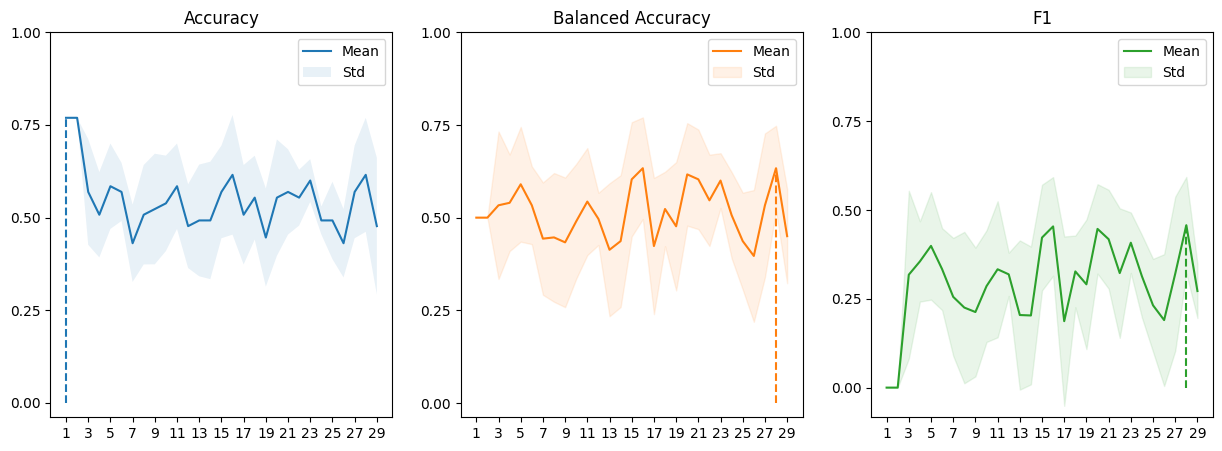

In [54]:
z_dims = np.arange(1, 30)

accuracies = np.zeros((len(z_dims), 3))
balanced_accuracies = np.zeros((len(z_dims), 3))
f1_scores = np.zeros((len(z_dims), 3))


fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, z_dim in enumerate(z_dims):
    print("[*] Z dim:", z_dim)
    gmm_classif = GaussianMixtureClassifier(
        z_dim=z_dim,
        optimizer=GradientDescent(learning_rate=0.01, n_iter=100),
        seed=0
    )
    mean_accuracy, mean_balanced_accuracy, mean_f1, mean_cm = evaluate(gmm_classif, gmm_classif.classify, training_steps=20)
    accuracies[i] = np.array([mean_accuracy.mean(), mean_accuracy.mean()-mean_accuracy.std(), mean_accuracy.mean()+mean_accuracy.std()])
    balanced_accuracies[i] = np.array([mean_balanced_accuracy.mean(), mean_balanced_accuracy.mean()-mean_balanced_accuracy.std(),  mean_balanced_accuracy.mean()+mean_balanced_accuracy.std()])
    f1_scores[i] = np.array([mean_f1.mean(), mean_f1.mean()-mean_f1.std(), mean_f1.mean()+mean_f1.std()])

axs[0].plot(z_dims, accuracies[:, 0], color='C0', label="Mean")
axs[1].plot(z_dims, balanced_accuracies[:, 0], color='C1', label="Mean")
axs[2].plot(z_dims, f1_scores[:, 0], color='C2', label="Mean")
axs[0].fill_between(z_dims, accuracies[:, 1], accuracies[:, 2], alpha=0.1, label="Std")
axs[1].fill_between(z_dims, balanced_accuracies[:, 1], balanced_accuracies[:, 2], color="C1", alpha=0.1, label="Std")
axs[2].fill_between(z_dims, f1_scores[:, 1], f1_scores[:, 2], alpha=0.1, color="C2", label="Std")
axs[0].vlines(x=np.argmax(accuracies[:, 0])+1, ymin=0, ymax=accuracies[:, 0].max(), color='C0', linestyles='--')
axs[1].vlines(x=np.argmax(balanced_accuracies[:, 0])+1, ymin=0, ymax=balanced_accuracies[:, 0].max(), color='C1', linestyles='--')
axs[2].vlines(x=np.argmax(f1_scores[:, 0])+1, ymin=0, ymax=f1_scores[:, 0].max(), color='C2', linestyles='--')
axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[0].set_xticks(z_dims[np.arange(0, len(z_dims), 2)])
axs[1].set_xticks(z_dims[np.arange(0, len(z_dims), 2)])
axs[2].set_xticks(z_dims[np.arange(0, len(z_dims), 2)])
axs[0].set_yticks(np.linspace(0, 1, 5))
axs[1].set_yticks(np.linspace(0, 1, 5))
axs[2].set_yticks(np.linspace(0, 1, 5))
axs[0].set_title("Accuracy")
axs[1].set_title("Balanced Accuracy")
axs[2].set_title("F1")
plt.show()

### Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(
    n_estimators=20,
    criterion='gini',
    max_depth=None,
    max_features='sqrt',
    max_samples=3,
    class_weight={0:1, 1:1}
)
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
print("Random forest metrics:")
print("Accuracy:", randomforest.score(X_test, y_test))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Random forest metrics:
Accuracy: 0.7692307692307693
Balanced Accuracy: 0.5
Confusion matrix:
 [[10  0]
 [ 3  0]]


In [56]:
_ = evaluate(randomforest, randomforest.predict)

* Fold 0
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.5
     F1 score: 0.0
     Confusion matrix:
 [[10  0]
 [ 3  0]]
* Fold 1
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.5
     F1 score: 0.0
     Confusion matrix:
 [[10  0]
 [ 3  0]]
* Fold 2
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.5
     F1 score: 0.0
     Confusion matrix:
 [[10  0]
 [ 3  0]]
* Fold 3
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.5
     F1 score: 0.0
     Confusion matrix:
 [[10  0]
 [ 3  0]]
* Fold 4
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.5
     F1 score: 0.0
     Confusion matrix:
 [[10  0]
 [ 3  0]]
[Summary]
     Accuracy: 0.7692307692307693 ± 0.0
     Balanced Accuracy: 0.5 ± 0.0
     F1 score: 0.0 ± 0.0
     (sum) Confusion matrix:
 [[50  0]
 [15  0]]


### XGBoost

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

xgboost = GradientBoostingClassifier(
    learning_rate=1.2,
    n_estimators=10,
    max_depth=1,
    random_state=0
)
xgboost.fit(X_train, y_train)
y_pred = xgboost.predict(X_test)
print("XGBoost metrics:")
print("Accuracy:", xgboost.score(X_test, y_test))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

XGBoost metrics:
Accuracy: 0.8461538461538461
Balanced Accuracy: 0.6666666666666666
Confusion matrix:
 [[10  0]
 [ 2  1]]


In [58]:
_ = evaluate(xgboost, xgboost.predict)

* Fold 0
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.85
     F1 score: 0.6666666666666666
     Confusion matrix:
 [[7 3]
 [0 3]]
* Fold 1
     Accuracy: 0.7692307692307693
     Balanced Accuracy: 0.6166666666666667
     F1 score: 0.4
     Confusion matrix:
 [[9 1]
 [2 1]]
* Fold 2
     Accuracy: 0.8461538461538461
     Balanced Accuracy: 0.7833333333333333
     F1 score: 0.6666666666666666
     Confusion matrix:
 [[9 1]
 [1 2]]
* Fold 3
     Accuracy: 0.9230769230769231
     Balanced Accuracy: 0.8333333333333333
     F1 score: 0.8
     Confusion matrix:
 [[10  0]
 [ 1  2]]
* Fold 4
     Accuracy: 0.8461538461538461
     Balanced Accuracy: 0.9
     F1 score: 0.7499999999999999
     Confusion matrix:
 [[8 2]
 [0 3]]
[Summary]
     Accuracy: 0.8307692307692307 ± 0.05756395979652218
     Balanced Accuracy: 0.7966666666666666 ± 0.09741092797468304
     F1 score: 0.6566666666666666 ± 0.1380821011813865
     (sum) Confusion matrix:
 [[43  7]
 [ 4 11]]


* Fold 0
* Fold 1
* Fold 2
* Fold 3
* Fold 4


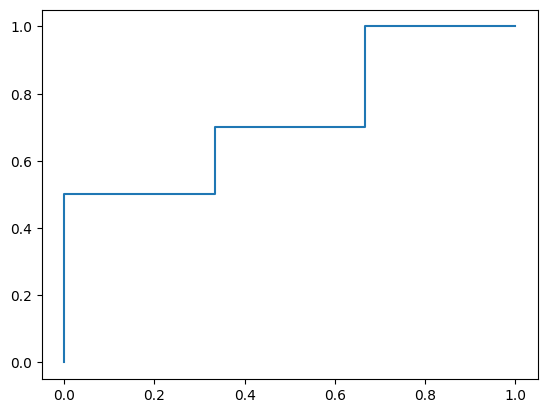

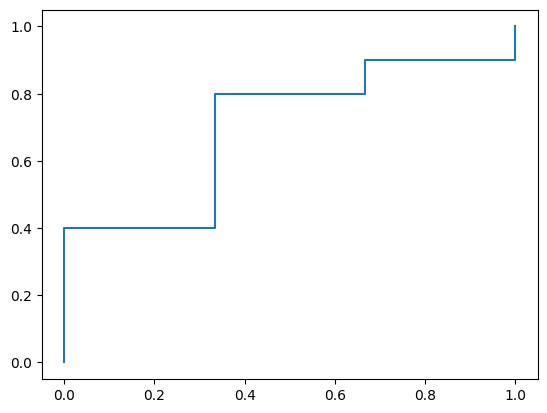

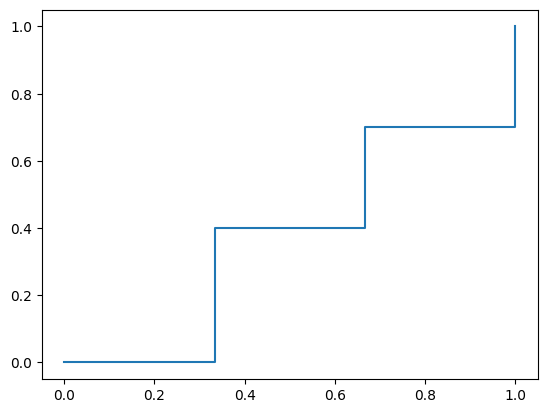

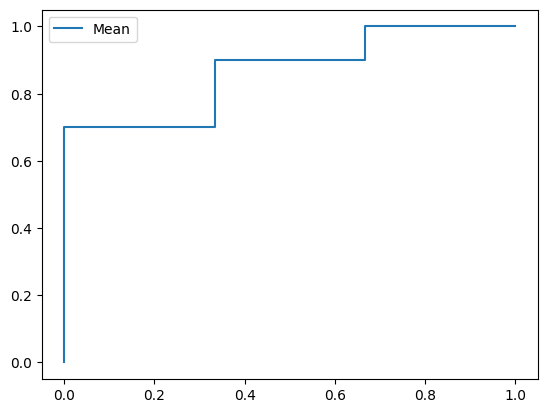

In [94]:
from sklearn.metrics import roc_curve
mean_scores = []

for i, (train_index, test_index) in enumerate(stratifier.split(X, y)):
        print("* Fold", i)
        X_train_fold, y_train_fold = X.values[train_index], y.values[train_index]
        X_test_fold, y_test_fold = X.values[test_index], y.values[test_index]
        xgboost.fit(X_train_fold, y_train_fold)
        scores = xgboost.predict_proba(X_test_fold)[:, 1]
        mean_scores.append(scores)

mean_scores = np.array(mean_scores)
scores_test = mean_scores.mean(axis=0)
fpr, tpr, thresholds = roc_curve(y_test, scores_test)
fig, axs = plt.subplots()
axs.plot(tpr, fpr, label="Mean")
axs.legend()
plt.show()